# Importing librarise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\EXCEL_PROJECT.xlsx - Full cart Store.csv")
df.head()

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,STATE,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,1029312,Women,44,04-12-2022,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,Women,29,04-12-2022,Delivered,Ajio,SET414-KR-NP-L,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,1641533,Women,67,04-12-2022,Delivered,Myntra,SET261-KR-PP-S,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,7490807,Women,20,04-12-2022,Delivered,Amazon,SET110-KR-PP-M,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,9293516,Women,62,04-12-2022,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False


In [3]:
df.shape

(31047, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             31047 non-null  int64 
 1   Order ID          31047 non-null  object
 2   Cust ID           31047 non-null  int64 
 3   Gender            31047 non-null  object
 4   Age               31047 non-null  int64 
 5   Date              31047 non-null  object
 6   Status            31047 non-null  object
 7   Channel           31047 non-null  object
 8   SKU               31047 non-null  object
 9   Category          31047 non-null  object
 10  Size              31047 non-null  object
 11  Qty               31047 non-null  object
 12  currency          31047 non-null  object
 13  Amount            31047 non-null  int64 
 14  ship-city         31047 non-null  object
 15  STATE             31047 non-null  object
 16  ship-postal-code  31047 non-null  int64 
 17  ship-country

In [5]:
df.isnull().sum()

index               0
Order ID            0
Cust ID             0
Gender              0
Age                 0
Date                0
Status              0
Channel             0
SKU                 0
Category            0
Size                0
Qty                 0
currency            0
Amount              0
ship-city           0
STATE               0
ship-postal-code    0
ship-country        0
B2B                 0
dtype: int64

#### There is no null values

In [6]:
df.duplicated().sum()

0

#### There is no duplicate values

In [7]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel ', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'STATE', 'ship-postal-code', 'ship-country', 'B2B'],
      dtype='object')

In [8]:
# unqiue value in columns
col=['Gender', 'Status',
       'Channel ', 'Category', 'Size', 'Qty', 'currency',
       'ship-city', 'STATE', 'ship-postal-code', 'ship-country', 'B2B']
for i in col:
    a=df[i].unique()
    print(i ,'=', a)
    print()

Gender = ['Women' 'Men' 'W' 'M']

Status = ['Delivered' 'Refunded' 'Cancelled' 'Returned']

Channel  = ['Myntra' 'Ajio' 'Amazon' 'Flipkart' 'Meesho' 'Others' 'Nalli']

Category = ['kurta' 'Set' 'Western Dress' 'Top' 'Saree' 'Blouse' 'Ethnic Dress'
 'Bottom']

Size = ['XXL' 'L' 'S' 'M' 'XL' 'XS' '3XL' 'Free' '6XL' '4XL' '5XL']

Qty = ['1' 'One' '2' '4' '3' 'Two' '5']

currency = ['INR']

ship-city = ['MOHALI' 'GURUGRAM' 'KOLKATA' ... 'North 24 parganas' 'DIPHU'
 'VILE BHAGAD MIDC']

STATE = ['PUNJAB' 'HARYANA' 'WEST BENGAL' 'TAMIL NADU' 'MAHARASHTRA' 'KARNATAKA'
 'ANDHRA PRADESH' 'KERALA' 'ASSAM' 'TELANGANA' 'DELHI' 'ODISHA'
 'RAJASTHAN' 'UTTAR PRADESH' 'MADHYA PRADESH' 'UTTARAKHAND'
 'ANDAMAN & NICOBAR ' 'GUJARAT' 'CHANDIGARH' 'JHARKHAND' 'BIHAR'
 'HIMACHAL PRADESH' 'PUDUCHERRY' 'DADRA AND NAGAR' 'SIKKIM' 'GOA'
 'ARUNACHAL PRADESH' 'MANIPUR' 'JAMMU & KASHMIR' 'TRIPURA' 'New Delhi'
 'CHHATTISGARH' 'Bihar' 'LADAKH' 'MEGHALAYA' 'NAGALAND' 'MIZORAM' 'Punjab'
 'Delhi' 'Arunachal pradesh']



In [9]:
# add new column as Month
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Month'] = df['Date'].dt.strftime('%B')
df['Month']

0        December
1        December
2        December
3        December
4        December
           ...   
31042     January
31043     January
31044     January
31045     January
31046     January
Name: Month, Length: 31047, dtype: object

In [10]:
df['Gender'].replace({'W': 'Women','M' : 'Men'},inplace=True)
df['Qty'].replace({'One':1 , 'Two':2},inplace=True)

In [11]:
df['Qty'] = df['Qty'].astype(int)

In [12]:
# add new column as Age Group
y = []
for age in df['Age']:
    if age >= 50:
        y.append('Senior')
    elif age > 30:
        y.append('Adult')
    else:
        y.append('Teenager')
        
print(pd.DataFrame(y))      

              0
0         Adult
1      Teenager
2        Senior
3      Teenager
4        Senior
...         ...
31042    Senior
31043     Adult
31044  Teenager
31045     Adult
31046     Adult

[31047 rows x 1 columns]


In [13]:
df['Age Group']=y
df.head(10)

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,...,Qty,currency,Amount,ship-city,STATE,ship-postal-code,ship-country,B2B,Month,Age Group
0,1,171-1029312-3038738,1029312,Women,44,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,...,1,INR,376,MOHALI,PUNJAB,140301,IN,False,December,Adult
1,2,405-2183842-2225946,2183842,Women,29,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,...,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False,December,Teenager
2,3,171-1641533-8921966,1641533,Women,67,2022-12-04,Delivered,Myntra,SET261-KR-PP-S,Set,...,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False,December,Senior
3,4,404-7490807-6300351,7490807,Women,20,2022-12-04,Delivered,Amazon,SET110-KR-PP-M,Set,...,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False,December,Teenager
4,5,403-9293516-4577154,9293516,Women,62,2022-12-04,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,...,1,INR,544,GURUGRAM,HARYANA,122001,IN,False,December,Senior
5,6,407-1298130-0368305,1298130,Men,49,2022-12-04,Delivered,Flipkart,JNE3797-KR-XXL,Western Dress,...,1,INR,735,SANGLI MIRAJ KUPWAD,MAHARASHTRA,416436,IN,False,December,Adult
6,7,407-1298130-0368305,1298130,Women,23,2022-12-04,Delivered,Meesho,JNE3801-KR-XXL,kurta,...,1,INR,735,BENGALURU,KARNATAKA,560029,IN,False,December,Teenager
7,8,171-5561216-3398711,5561216,Women,70,2022-12-04,Delivered,Others,JNE3405-KR-M,kurta,...,1,INR,435,GURUGRAM,HARYANA,122001,IN,False,December,Senior
8,9,408-2935263-2935550,2935263,Women,75,2022-12-04,Delivered,Amazon,JNE3474-KR-E-XL,kurta,...,1,INR,385,BENGALURU,KARNATAKA,562149,IN,False,December,Senior
9,10,404-2648970-9042715,2648970,Women,43,2022-12-04,Delivered,Myntra,JNE3466-KR-L,kurta,...,1,INR,771,VIJAYAWADA,ANDHRA PRADESH,520002,IN,False,December,Adult


# Exploratory Data Analysis

## Month 

In [14]:
Month_sales=df.groupby(by='Month').sum()['Amount'].reset_index().sort_values('Amount',ascending=False)
Month_sales

,Month,Amount
7,March,1928066
3,February,1875932
0,April,1829263
4,January,1820601
1,August,1808505
8,May,1797822
5,July,1772300
6,June,1750966
11,September,1688871
10,October,1666662


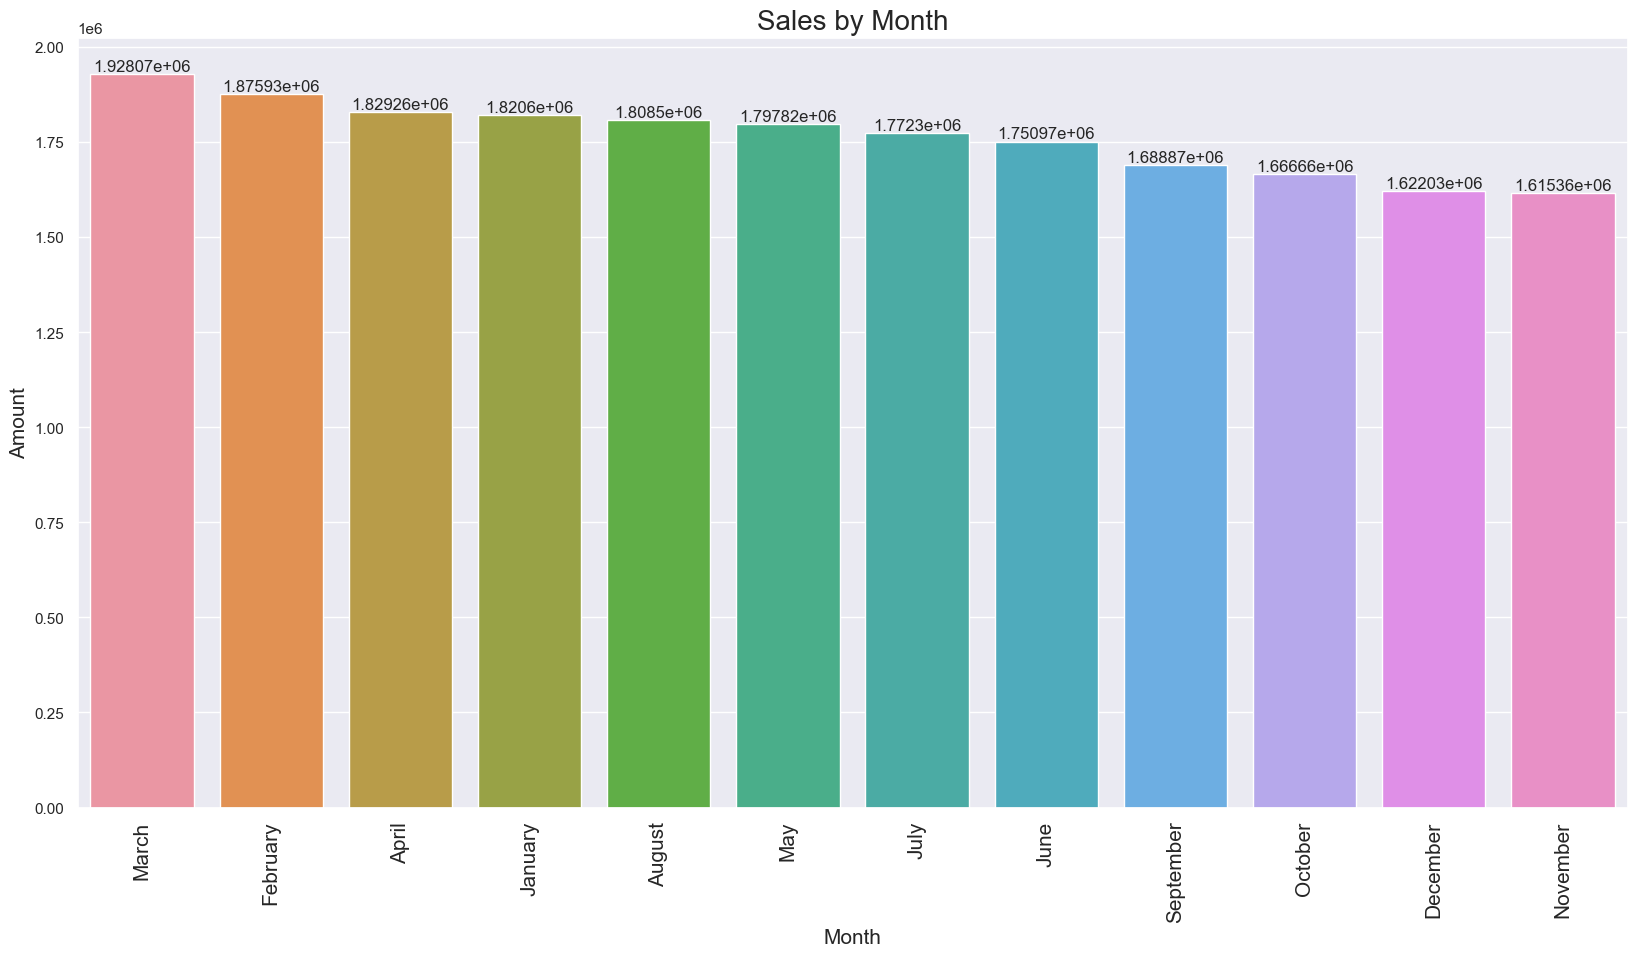

In [15]:
sns.set()
plt.figure(figsize=(20,10))
ag=sns.barplot(data=Month_sales , x='Month' , y='Amount',)
for bars in ag.containers:
    ag.bar_label(bars)
plt.title('Sales by Month',fontsize=20)
plt.xlabel('Month' ,fontsize=15)
plt.ylabel( 'Amount' ,fontsize=15)
plt.xticks(rotation=90 , fontsize=15)
plt.show()


### Note : From above graph we can see more sales are in the march month

## Gender

In [16]:
Gender_sales=df.groupby(by='Gender').sum()['Amount'].reset_index().sort_values('Amount',ascending=False)
Gender_sales

,Gender,Amount
1,Women,13562773
0,Men,7613604


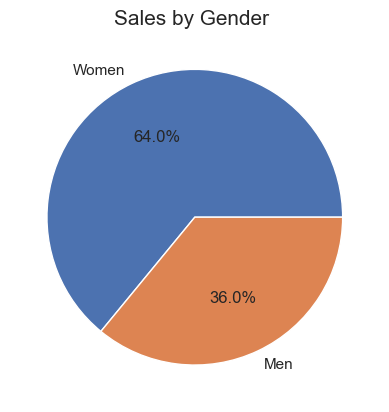

In [17]:
plt.pie(x='Amount' ,labels='Gender', data=Gender_sales,autopct='%0.1f%%')
plt.title('Sales by Gender ',fontsize=15)
plt.show()

### Note : From above graph the women are buying more product than men

## Status

In [18]:
Order_Status=df.groupby(by='Status').count()['Order ID'].reset_index().sort_values('Order ID',ascending=False)
Order_Status

,Status,Order ID
1,Delivered,28641
3,Returned,1045
0,Cancelled,844
2,Refunded,517


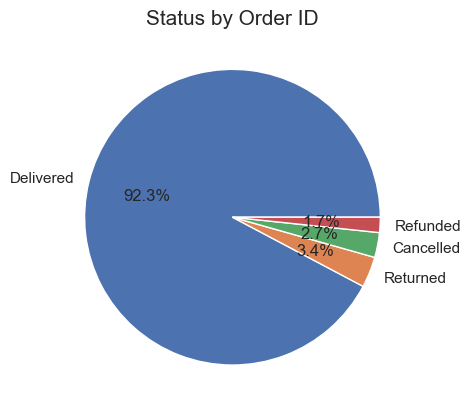

In [19]:
plt.pie(x='Order ID',labels='Status', data=Order_Status,autopct='%0.1f%%')
plt.title('Status by Order ID',fontsize=15)
plt.show()

###  Note : From above graph the majority of the order are Delivered

## States

In [20]:
State_Sales=df.groupby(by='STATE').sum()['Amount'].reset_index().sort_values('Amount',ascending=False).head(10)
State_Sales

,STATE,Amount
22,MAHARASHTRA,3001779
18,KARNATAKA,2645078
37,UTTAR PRADESH,2104133
35,TELANGANA,1718226
34,TAMIL NADU,1678212
10,DELHI,1261865
19,KERALA,1008176
39,WEST BENGAL,921202
1,ANDHRA PRADESH,910862
14,HARYANA,812063


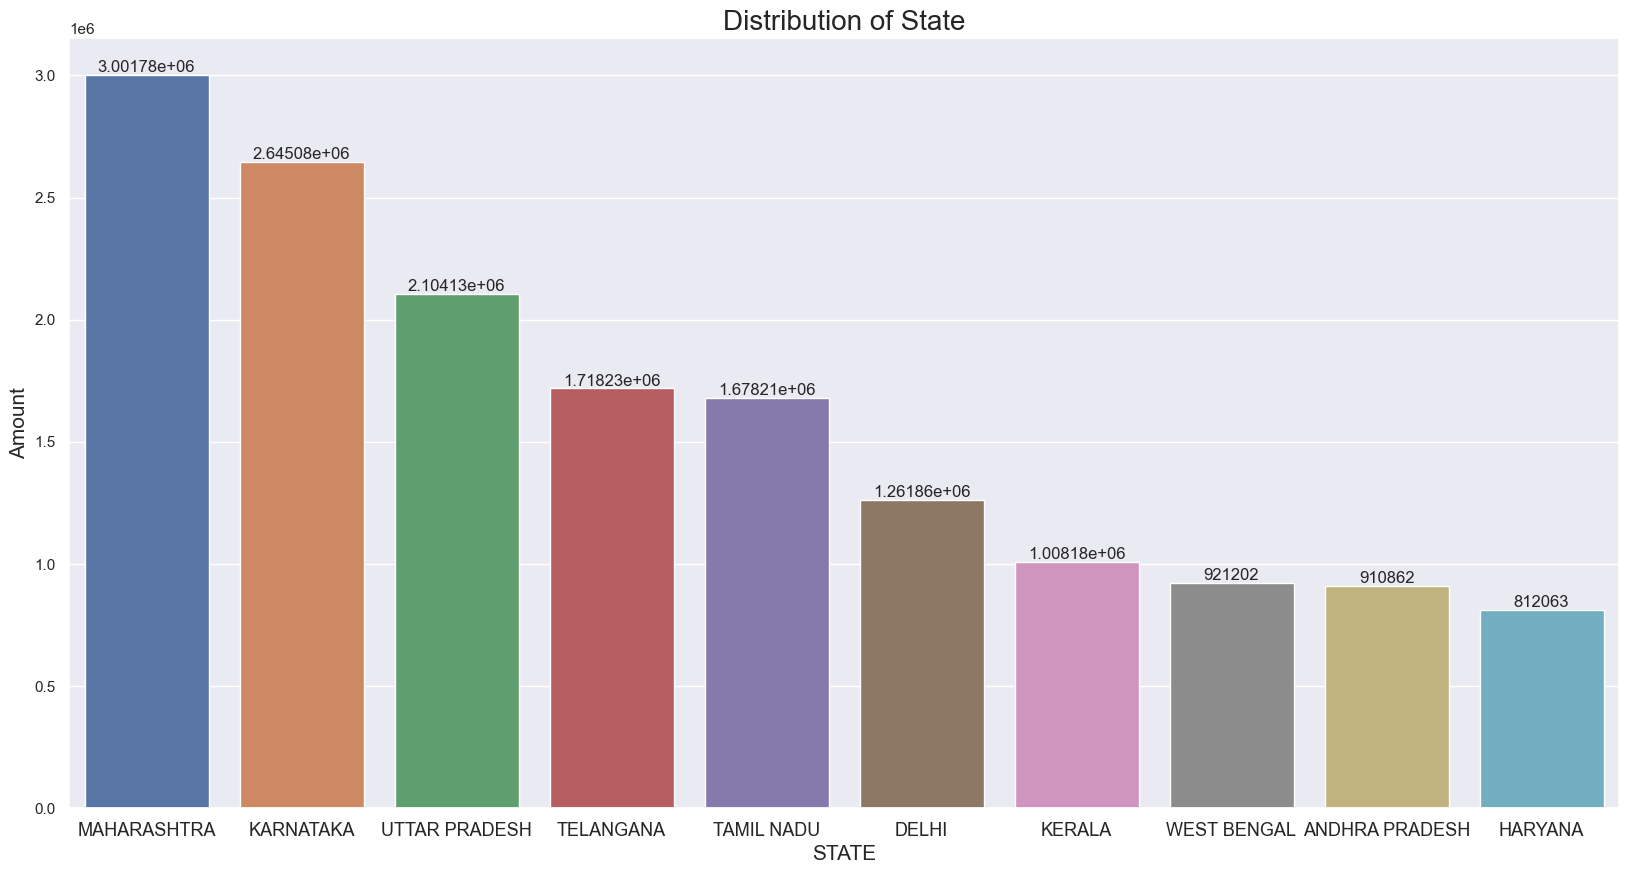

In [21]:
sns.set()
plt.figure(figsize=(20,10))
ax=sns.barplot(data=State_Sales , x='STATE' , y='Amount',)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of State',fontsize=20) 
plt.xlabel('STATE' ,fontsize=15)
plt.ylabel( 'Amount' ,fontsize=15)
plt.xticks( fontsize=13)

plt.show()

### Note :  From above graph we can see more sales are in the  Maharashtra State 

## City

In [22]:
Orders_city=df.groupby(by='ship-city').count()['Order ID'].reset_index().sort_values('Order ID',ascending=False).head(10)
Orders_city

,ship-city,Order ID
244,BENGALURU,2540
878,HYDERABAD,1785
1573,NEW DELHI,1560
444,CHENNAI,1272
1416,MUMBAI,1224
1790,PUNE,726
1136,KOLKATA,571
792,GURUGRAM,439
1291,LUCKNOW,421
1588,NOIDA,327


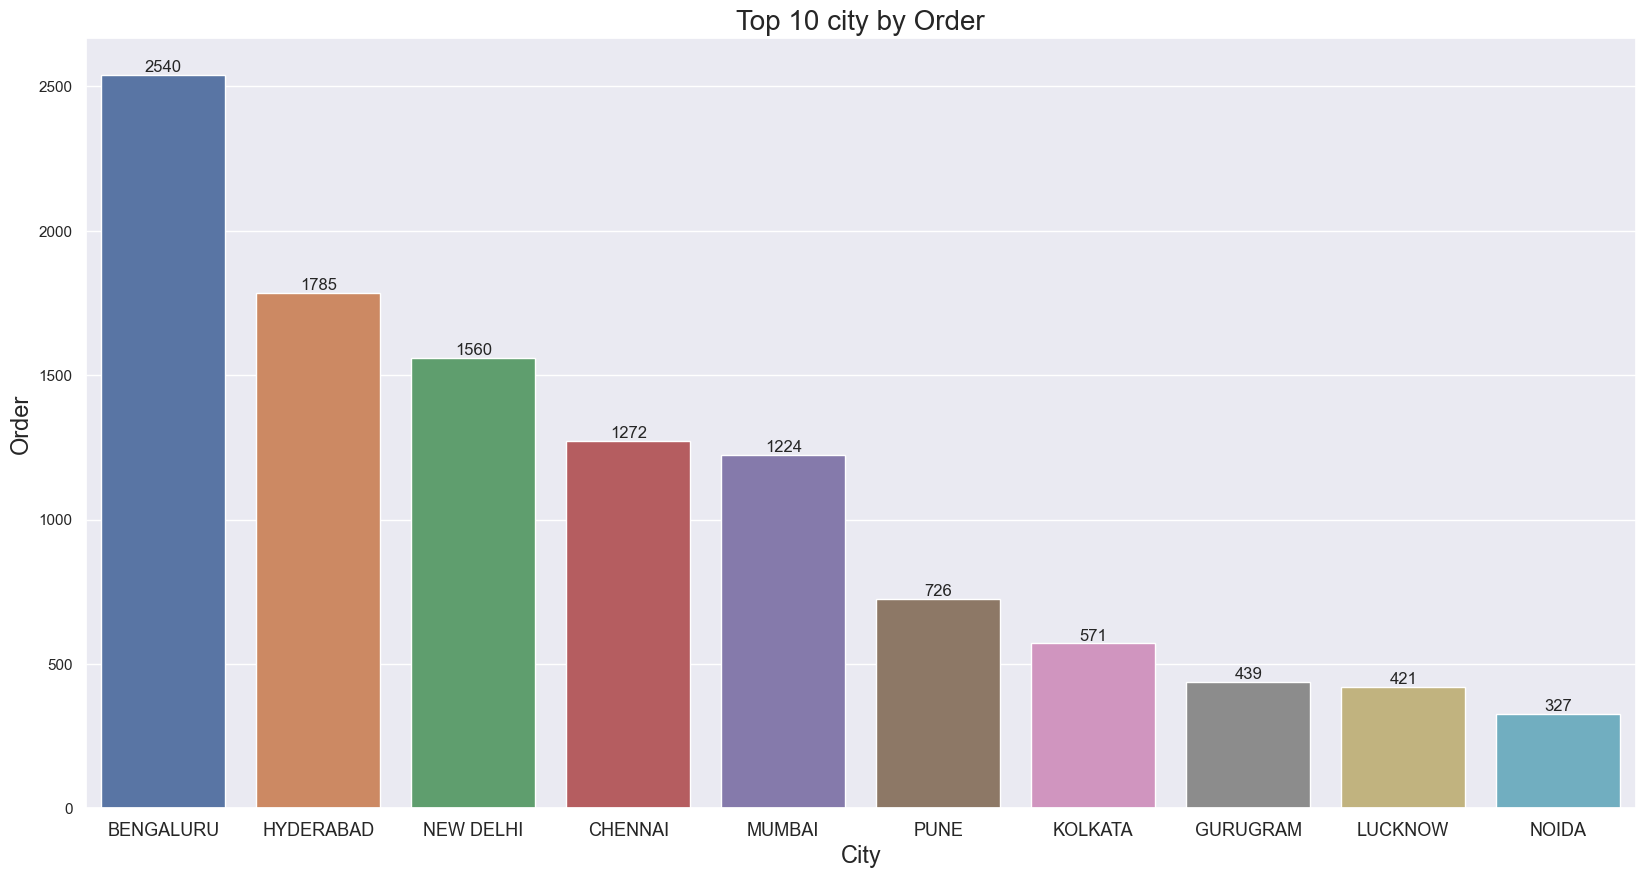

In [23]:
plt.figure(figsize=(20,10))
ax=sns.barplot(data=Orders_city , x='ship-city' , y='Order ID')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 city by Order',fontsize=20)
plt.xlabel('City', fontsize=17)
plt.ylabel('Order', fontsize=17)
plt.xticks( fontsize=13)

plt.show()

### Note : From above graph you can see that most of the buyers are Bengaluru City

## Age Group

In [24]:
State_Sales=df.groupby(by=['Age Group','Gender']).sum()['Amount'].reset_index()
State_Sales

,Age Group,Gender,Amount
0,Adult,Men,3647621
1,Adult,Women,6442322
2,Senior,Men,1463267
3,Senior,Women,2691495
4,Teenager,Men,2502716
5,Teenager,Women,4428956


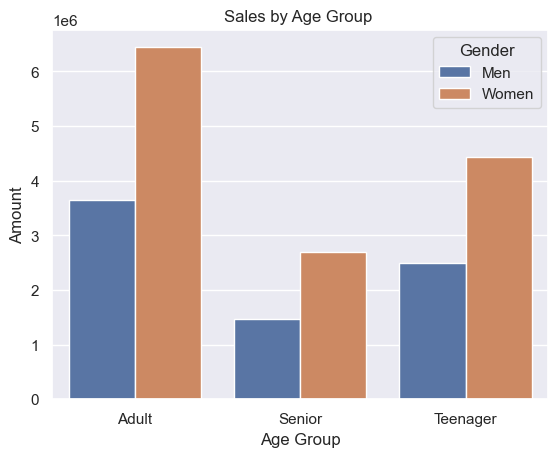

In [35]:
ag=sns.barplot(data=State_Sales , x= 'Age Group' , y='Amount' , hue='Gender',)
plt.title('Sales by Age Group ')
plt.show()

### Note : From above graph you can see that most of the buyers are Adult

## Category

In [26]:
Top_Selling_catgory=df.groupby(by='Category').count()['Order ID'].reset_index().sort_values('Order ID',ascending=False)
Top_Selling_catgory

,Category,Order ID
4,Set,12391
7,kurta,10446
6,Western Dress,4066
5,Top,2193
3,Saree,1380
2,Ethnic Dress,264
0,Blouse,229
1,Bottom,78


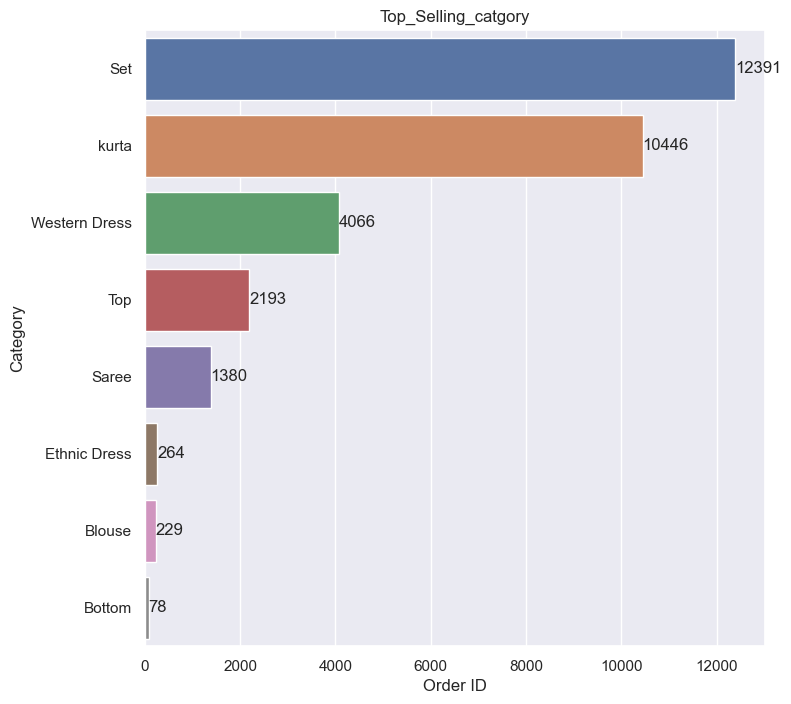

In [27]:
plt.figure(figsize=(8,8))
ax=sns.barplot(data=Top_Selling_catgory,y='Category',x='Order ID')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top_Selling_catgory')    
plt.show()

### Note : From above graph you can see that most of people buying Set

## Channel

In [28]:
df.rename(columns={'Channel ': 'Channel'}, inplace=True)

In [29]:
Orders_Channel=df.groupby(by='Channel').count()['Order ID'].reset_index().sort_values('Order ID',ascending=False)
Orders_Channel

,Channel,Order ID
1,Amazon,11016
4,Myntra,7254
2,Flipkart,6703
0,Ajio,1931
5,Nalli,1484
3,Meesho,1398
6,Others,1261


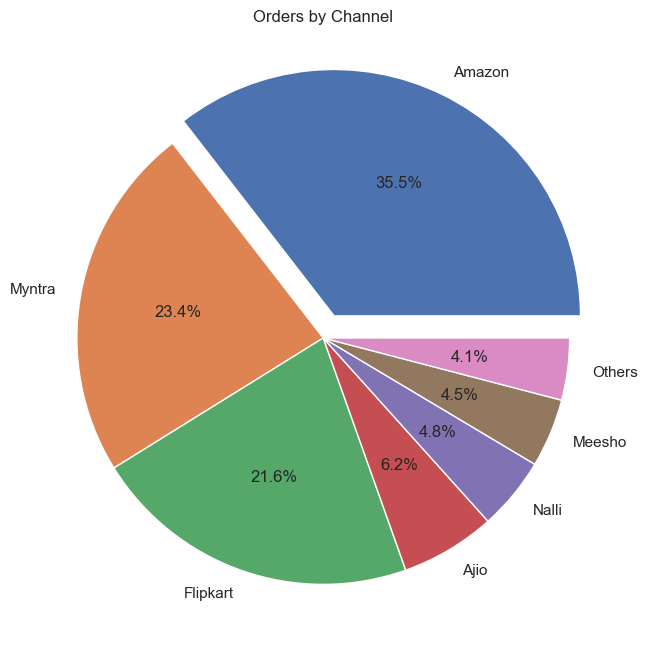

In [30]:
plt.figure(figsize=(8,8))
plt.pie(data=Orders_Channel , x='Order ID' ,explode= (0.1, 0, 0, 0, 0,0,0),labels='Channel' ,autopct='%0.1f%%')
plt.title('Orders by Channel')
plt.show()

### Note : From above graph you can see that most of people buyers by Amazon

## B2B

In [31]:
B2B_Orders=df.groupby(by='B2B').count()['Order ID'].reset_index()
B2B_Orders

,B2B,Order ID
0,False,30861
1,True,186


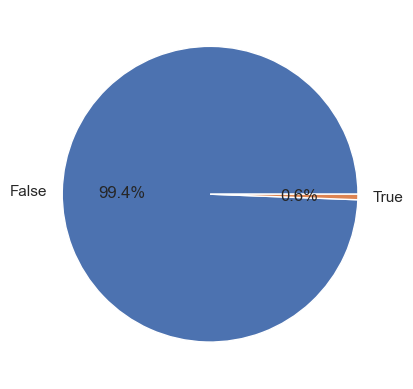

In [32]:
plt.pie(data=B2B_Orders , x='Order ID' , labels='B2B',autopct='%0.1f%%')
plt.show()

###  Note : From above graph we can see that maximum i.e 99.4% of buyers are retailers and 0.6% are B2B buyers

## Size

In [33]:
Orders_Size=df.groupby(by='Size').count()['Order ID'].reset_index().sort_values('Order ID',ascending=False)
Orders_Size

,Size,Order ID
6,M,5485
5,L,5144
8,XL,4437
7,S,4176
10,XXL,4065
0,3XL,3347
9,XS,2503
4,Free,1408
3,6XL,208
2,5XL,161


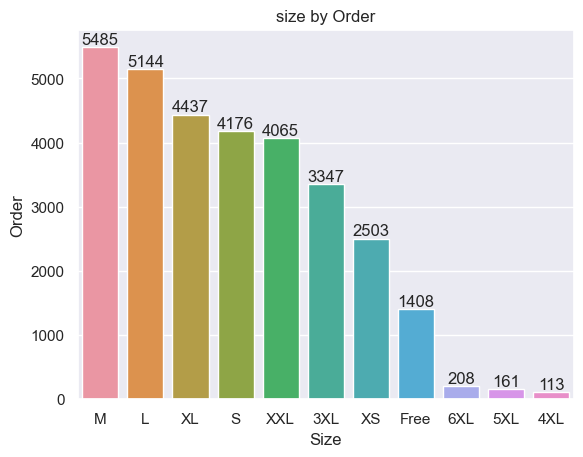

In [34]:
ax=sns.barplot(data=Orders_Size , x='Size' , y='Order ID')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('size by Order')
plt.ylabel('Order')    
plt.show()    

### Note : From above graph you can see that most of people buying M-size

# Conclusion

### The data analysis reveals that the business has a singnificant customer base Maharashtra State and Bengaluru City ,Mainly serves retailers,most of people buyers by Amazon,High demand for set and M-size as the preferred choice among buyers and most of the buyers are Adult. 

# Suggestion 

 ### 1. Maharashtra State is highest selling state in terms of products , I know if Maharashtra is the State where you are getting most of revenue my analysis is to the company would be you need to have better supply chain,more warehouses, more delivery people in Maharashtra considering most of our customer buy in that particular state so we want to attract more customers from the same state so that we can increase the revenue .

### 2. 	Similarly  see bottom 5 states and  understand in which state  sales is low in those cases I could suggest you that you can have more campaigns, There maybe sales in more offline stores if that works in particular state so that revenue can increased. 

### 3.Gender basis  women are buying more  product than men. you can have targeted ads and targeted campaigns so that you can reach out to more women audience and have more products getting sold   